In [1]:
import os
import librosa
import librosa.display
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook
import csv 
import warnings
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

## Display some MFCCs 

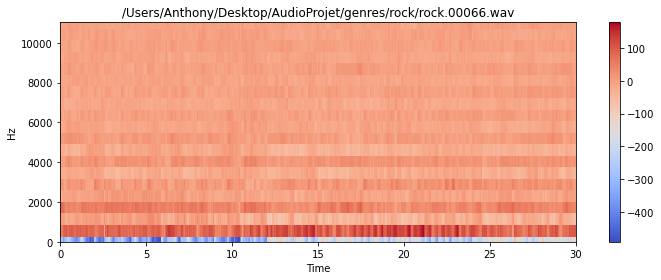

In [2]:

# Reference 
# https://medium.com/@navdeepsingh_2336/identifying-the-genre-of-a-song-with-neural-networks-851db89c42f0
path = '/Users/Anthony/Desktop/AudioProjet/genres'
def display_mfcc(audio):
    y, sr = librosa.load(audio)
    # n_mfcc is the feature vector dimension of each frame, the default is 20
    mfcc = librosa.feature.mfcc(y=y,sr=sr)
    plt.figure(figsize=(10,4))
    librosa.display.specshow(mfcc, x_axis = 'time', y_axis = 'hz')
    plt.colorbar()
    plt.title(audio)
    plt.tight_layout()
#jazz = path + '/jazz/jazz.00066.wav'
#plt.show(display_mfcc(jazz))
#classical = path + '/classical/classical.00066.wav'
#plt.show(display_mfcc(classical))
#hiphop = path + '/hiphop/hiphop.00066.wav'
#plt.show(display_mfcc(hiphop))
rock = path + '/rock/rock.00066.wav'
plt.show(display_mfcc(rock))


## Extraction MFCC features

In [3]:
# Create csv file
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):   # 20 mfcc features for 1 frame
    header += f' mfcc{i}'
header += ' label'
header = header.split()
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
# Traverse 10 types of music
for g in genres:
    for filename in os.listdir(path + f'/{g}'):
        songname = path + f'/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        # Get different features
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rms = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        # Calculate the mean value of different features and write it to a csv file
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}' 
        for m in mfcc:
            to_append += f' {np.mean(m)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())


## Part for test 

In [ ]:
#blues = '/Users/Anthony/Desktop/AudioProjet/genres/blues/blues.00066.wav'
#y, sr = librosa.load(blues, mono=True, duration=30)
#chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
#mean = np.mean(chroma_stft)
#mfcc_blues = librosa.feature.mfcc(y=y, sr=sr)
#mfcc_blues.shape
